Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Predicted attribute: class of iris plant. 

This is an exceedingly simple domain. 

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.


Attribute Information:

1. sepal length in cm 萼片长度
2. sepal width in cm 萼片宽度
3. petal length in cm 花瓣长度
4. petal width in cm 花瓣宽度
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica

```
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
......
```

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
data_X, data_Y = iris.data, iris.target
print('data length:', len(data_X))

data length: 150


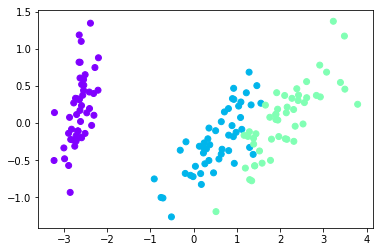

In [2]:
% matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
import numpy as np

# 降维
pca = PCA(n_components=2)
newdata = pca.fit_transform(data_X)
colors = cm.rainbow(np.linspace(0, 1, 5))

x = []
y = []
c = []

for i in range(len(newdata)):
    x.append(newdata[i][0])
    y.append(newdata[i][1])
    c.append(colors[data_Y[i]])

plt.scatter(x, y, color=c)
plt.show()

### Sklearn K-means

In [3]:
from sklearn.cluster import KMeans

km_cluster = KMeans(n_clusters=3, max_iter=100, init='k-means++')
predictions = km_cluster.fit_predict(data_X)
print('result:', predictions)
print('clusters: first classes: %d, second classes: %d, thrid classes: %d' %
      (np.sum(predictions == 0), np.sum(predictions == 1), np.sum(predictions == 2)))

result: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
clusters: first classes: 50, second classes: 62, thrid classes: 38


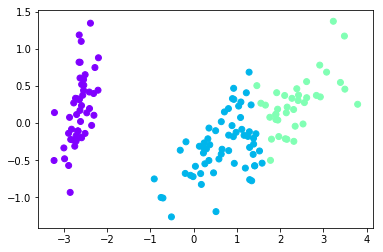

In [4]:
x = []
y = []
c = []

for i in range(len(newdata)):
    x.append(newdata[i][0])
    y.append(newdata[i][1])
    c.append(colors[predictions[i]])

plt.scatter(x, y, color=c)
plt.show()

### Native K-means

In [5]:
from numpy import *

def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2)))

def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k, n)))
    for j in range(n):
        minJ = min(dataSet[:, j])
        rangeJ = float(max(dataSet[:, j]) - minJ)
        centroids[:, j] = minJ + rangeJ * random.rand(k, 1)
    return centroids

def kMeans(dataSet, k, distMeas=distEclud, creatCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m, 2)))
    centroids = creatCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):  # 寻找质心
            minDist = inf
            minIndex = -1
            for j in range(k):
                disJI = distMeas(centroids[j, :], dataSet[i, :])
                if disJI < minDist:
                    minDist = disJI
                    minIndex = j
            if clusterAssment[i, 0] != minIndex:
                clusterChanged = True
            clusterAssment[i, :] = minIndex, minDist
        for cent in range(k):  # 更新质心
            ptInClust = dataSet[nonzero(clusterAssment[:, 0].A == cent)[0]]
            centroids[cent, :] = mean(ptInClust, axis=0)
    return centroids, clusterAssment

### K = 2

In [6]:
myCentroids, clustAssing = kMeans(newdata, 2)
print('centroids:', myCentroids)
print('clusters: first classes: %d, second classes: %d' %
      (np.sum(clustAssing == 0), np.sum(clustAssing == 1)))

centroids: [[-2.53601981  0.12763956]
 [ 1.38566031 -0.0697412 ]]
clusters: first classes: 53, second classes: 97


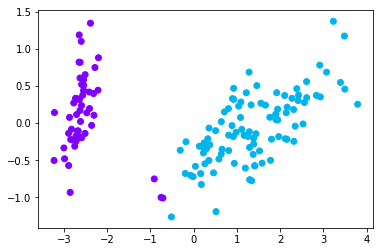

In [7]:
x = []
y = []
c = []

for i in range(len(newdata)):
    x.append(newdata[i][0])
    y.append(newdata[i][1])
    c.append(colors[int(clustAssing[:, 0][i])])

plt.scatter(x, y, color=c)
plt.show()

### K = 3

In [8]:
myCentroids, clustAssing = kMeans(newdata, 3)
print('centroids:', myCentroids)
print('clusters: first classes: %d, second classes: %d, thrid classes: %d' %
      (np.sum(clustAssing == 0), np.sum(clustAssing == 1), np.sum(clustAssing == 2)))

centroids: [[ 0.66443351 -0.33029221]
 [ 2.34645113  0.27235455]
 [-2.64084076  0.19051995]]
clusters: first classes: 61, second classes: 39, thrid classes: 50


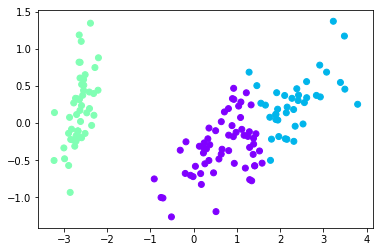

In [9]:
x = []
y = []
c = []

for i in range(len(newdata)):
    x.append(newdata[i][0])
    y.append(newdata[i][1])
    c.append(colors[int(clustAssing[:, 0][i])])

plt.scatter(x, y, color=c)
plt.show()

### K = 4

In [10]:
myCentroids, clustAssing = kMeans(newdata, 4)
print('centroids:', myCentroids)
print('clusters: first classes: %d, second classes: %d, thrid classes: %d, fourth classes: %d' %
      (np.sum(clustAssing == 0), np.sum(clustAssing == 1), np.sum(clustAssing == 2), np.sum(clustAssing == 3)))

centroids: [[ 1.20841421 -0.10038708]
 [-2.64084076  0.19051995]
 [ 0.08517315 -0.55451833]
 [ 2.50616813  0.29880836]]
clusters: first classes: 41, second classes: 50, thrid classes: 27, fourth classes: 32


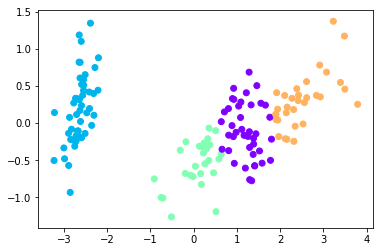

In [11]:
x = []
y = []
c = []

for i in range(len(newdata)):
    x.append(newdata[i][0])
    y.append(newdata[i][1])
    c.append(colors[int(clustAssing[:, 0][i])])

plt.scatter(x, y, color=c)
plt.show()